<a href="https://colab.research.google.com/github/devdattaraorane/Used_Car_Price_Prediction/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

Exploring the Data


In [2]:
car=pd.read_csv('/content/quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
car.shape

(892, 6)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [9]:
car['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [10]:
car['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [11]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

#Quality
*   year has many non-year value
*   year obj to int
*price has Ask for price
-price object to int
-kms driven obj to int
-kms driven has nan values
-fuel has nan values
-keep first 3 words of name

In [12]:
#Creating backup copy
backup=car.copy()

#Cleaning Data

In [13]:
#cleaning year
#year has many non-year values
car['year'] = car['year'].astype(str)

car=car[car['year'].str.isnumeric()]

#year is in object. Change to integer
car['year']=car['year'].astype(int)

car['year'].unique()
#car.info()

<ipython-input-13-807f3a0ffca1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)


array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [14]:
#cleaning price
#Price has Ask for Price
car['Price'] = car['Price'].astype(str)

car=car[car['Price']!='Ask For Price']

#Price has commas in its prices and is in object
car['Price']=car['Price'].str.replace(',','').astype(int)

car['Price'].unique()
#car.info()

<ipython-input-14-481f740ddde5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Price'] = car['Price'].astype(str)
<ipython-input-14-481f740ddde5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Price']=car['Price'].str.replace(',','').astype(int)


array([  80000,  425000,  325000,  575000,  175000,  190000,  830000,
        250000,  182000,  315000,  415000,  320000, 1000000,  500000,
        350000,  160000,  310000,   75000,  100000,  290000,   95000,
        180000,  385000,  105000,  650000,  689999,  448000,  549000,
        501000,  489999,  280000,  349999,  284999,  345000,  499999,
        235000,  249999, 1475000,  395000,  220000,  170000,   85000,
        200000,  570000,  110000,  448999, 1891111,  159500,  344999,
        449999,  865000,  699000,  375000,  224999, 1200000,  195000,
        351000,  240000,   90000,  155000,  600000,  189500,  210000,
        390000,  135000, 1600000,  701000,  265000,  525000,  372000,
        635000,  550000,  485000,  329500,  251111,  569999,   69999,
        299999,  399999,  450000,  270000,  158400,  179000,  125000,
        299000,  150000,  275000,  285000,  340000,   70000,  289999,
        849999,  749999,  274999,  984999,  599999,  244999,  474999,
        245000,  169

In [15]:
#cleaning kms_driven
# Similarly, convert 'kms_driven' column to string type if needed
car['kms_driven'] = car['kms_driven'].astype(str)

# Perform operations on 'kms_driven' column
car['kms_driven'] = car['kms_driven'].str.split(' ').str.get(0).str.replace(',', '')

#kms_driven has object values with kms at last.
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#It has nan values and two rows have 'Petrol' in them
car=car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)

car['kms_driven'].unique()
#car.info()

<ipython-input-15-fbb7f0dcf3b9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven']=car['kms_driven'].astype(int)


array([ 45000,     40,  28000,  36000,  41000,  25000,  24530,  60000,
        30000,  32000,  48660,   4000,  16934,  43000,  35550,  39522,
        39000,  55000,  72000,  15975,  70000,  23452,  35522,  48508,
        15487,  82000,  20000,  68000,  38000,  27000,  33000,  46000,
        16000,  47000,  35000,  30874,  15000,  29685, 130000,  19000,
        54000,  13000,  38200,  22000,  50000,  13500,   3600,  45863,
        60500,  12500,  18000,  13349,  29000,  44000,  42000,  14000,
        49000,  36200,  51000, 104000,  33333,  33600,   5600,   7500,
        26000,  24330,  65480, 200000,  59000,  99000,   2800,  21000,
        11000,  66000,   3000,   7000,  38500,  37200,  43200,  24800,
        45872,  40000,  11400,  97200,  52000,  31000, 175430,  37000,
        65000,   3350,  75000,  62000,  73000,   2200,  54870,  34580,
        97000,     60,  80200,   3200,      0,   5000,    588,  71200,
       175400,   9300,  56758,  10000,  56450,  56000,  32700,   9000,
      

In [16]:
#Company does not need any cleaning now. Changing car names. Keeping only the first three words
car['name']=car['name'].str.split().str.slice(0,3).str.join(' ')
#Resetting the index of the final cleaned data
car=car.reset_index(drop=True)

#Cleaned Data

In [17]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [18]:
car.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


In [19]:
car[car['Price']>6000000]
#this is an outlier

,name,company,year,Price,kms_driven,fuel_type
535,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [20]:
car=car[car['Price']<6000000].reset_index(drop=True)

In [21]:
#cleaned data
car.to_csv('Cleaned_Car_data.csv')

#Exploring the relationships in data

In [22]:
#Checking relationship of Company with Price
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

<ipython-input-23-1f2edadbed98>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


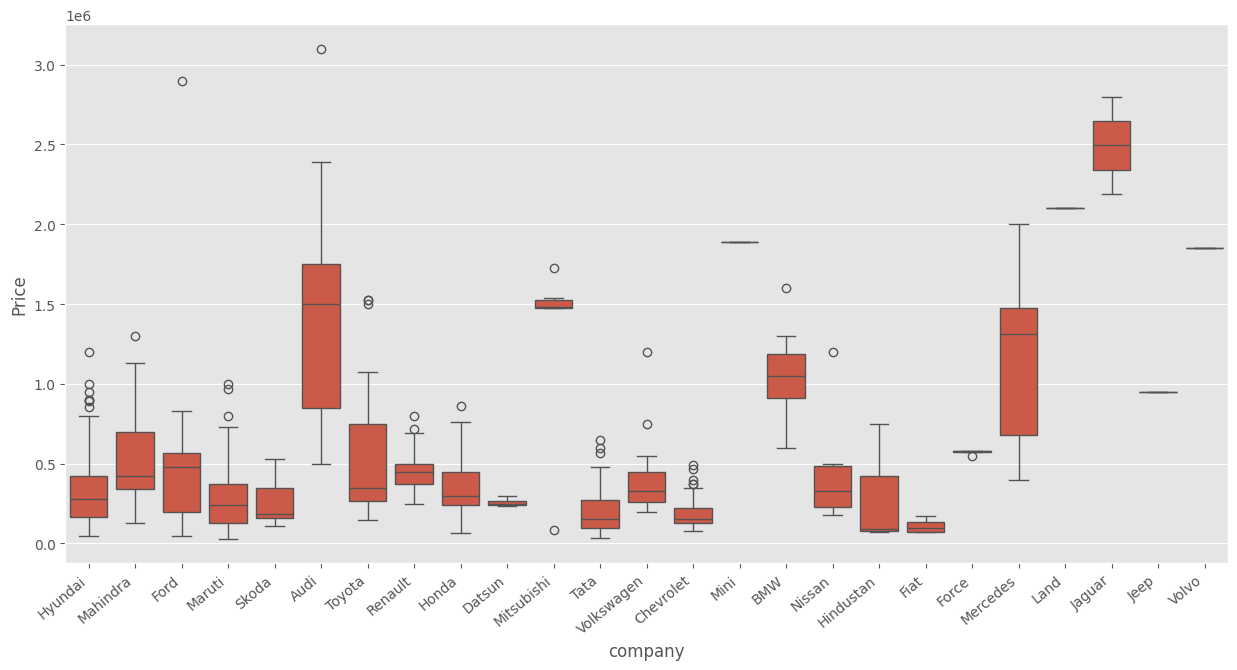

In [23]:
import seaborn as sns
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.7% of the points cannot be placed

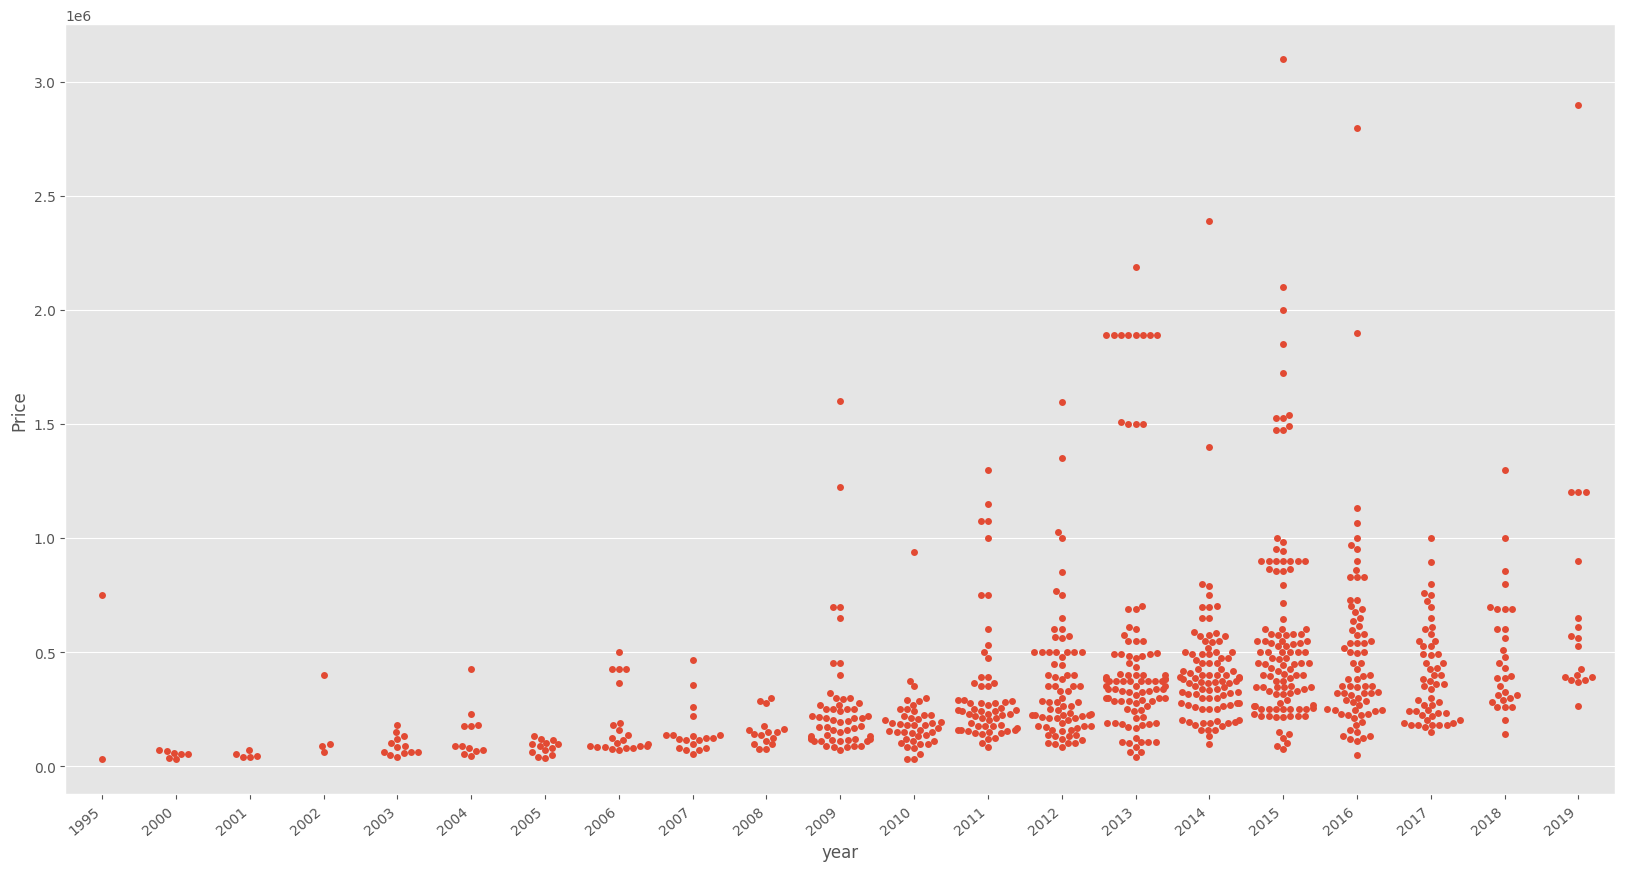

In [24]:
#Checking relationship of Year with Price
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

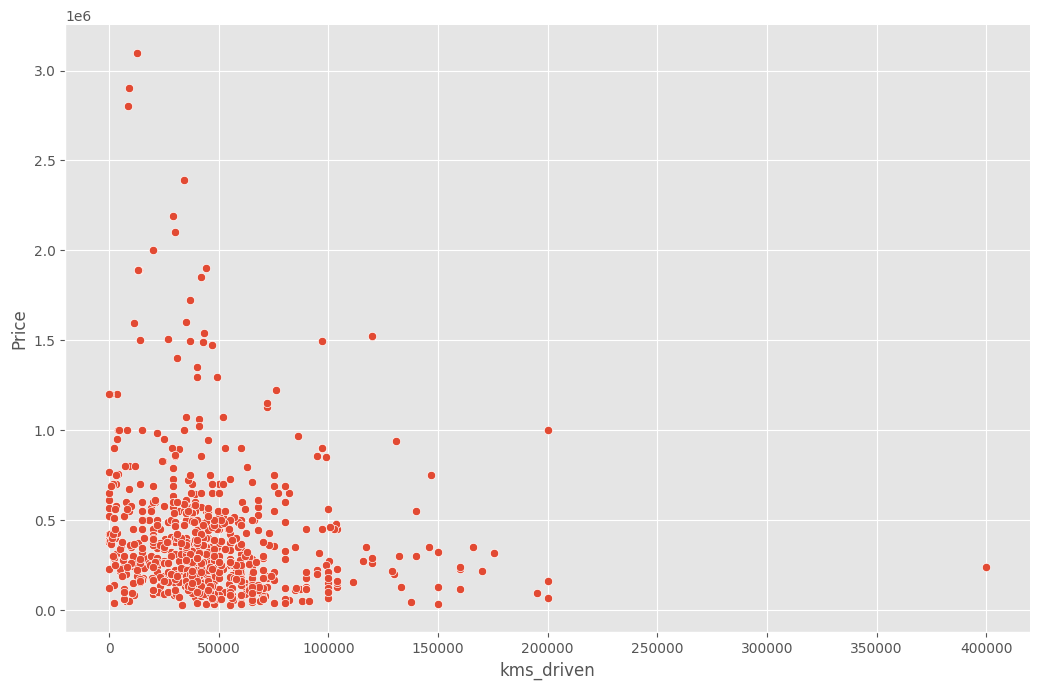

In [25]:
#Checking relationship of kms_driven with Price
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

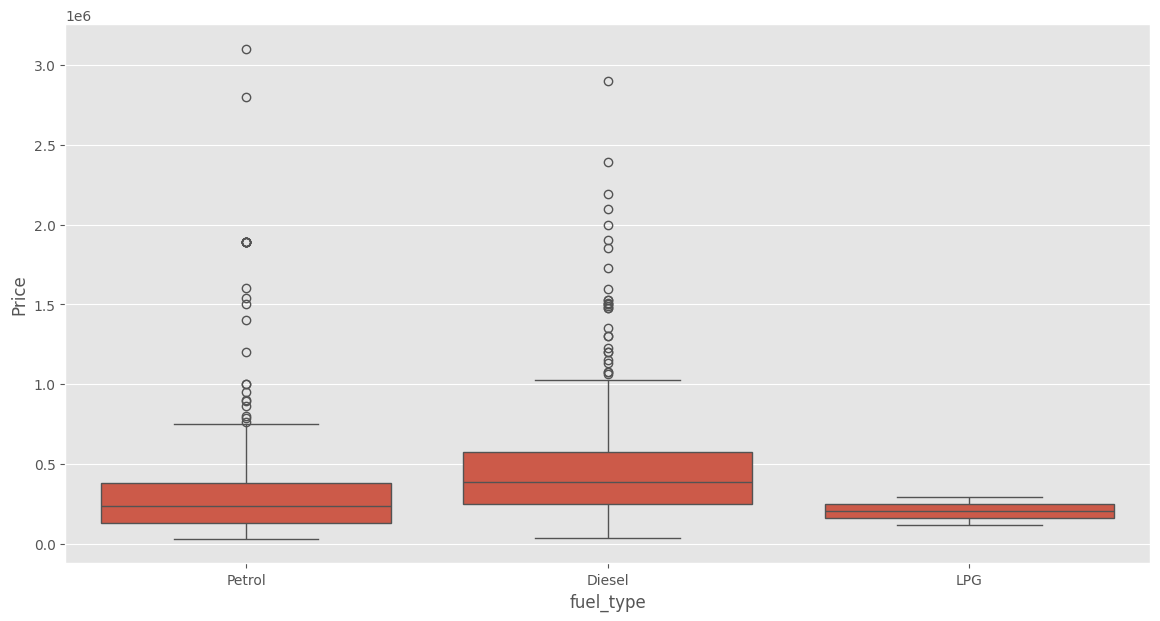

In [26]:
#Checking relationship of Fuel Type with Price
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

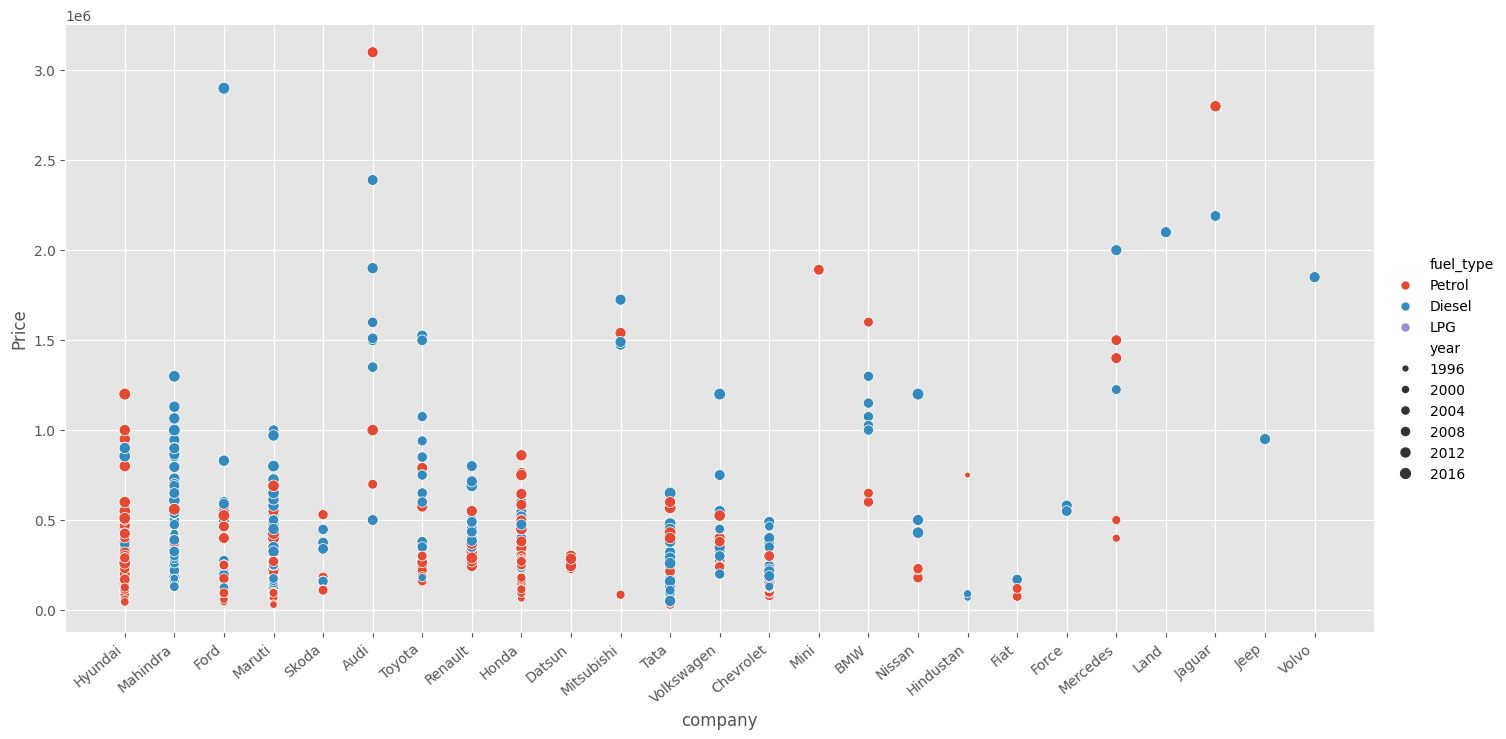

In [27]:
#Relationship of Price with FuelType, Year and Company mixed
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

#Extracting Training Data


In [28]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [29]:
y.shape

(816,)

#Applying Train Test Split


In [30]:
from sklearn.model_selection import train_test_split    #scikit learn
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [31]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#Creating an OneHotEncoder object to contain all the possible categories


In [32]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [33]:
#Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#Linear Regression Model

In [34]:
lr=LinearRegression()

In [35]:
#Making a pipeline
pipe=make_pipeline(column_trans,lr)

In [36]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol', nan], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [37]:
y_pred=pipe.predict(X_test)
y_pred

array([ 1.25232185e+05,  2.38882229e+05, -1.99566123e+05,  2.76039959e+05,
        5.81150611e+05,  1.95661673e+05,  2.50717457e+05,  3.66131990e+05,
        1.11901353e+06,  4.08247476e+05,  8.04189644e+04,  2.17696837e+04,
       -9.54325286e+04,  2.94850502e+05,  8.99076649e+04,  5.41927337e+05,
        3.08797462e+05,  1.60921173e+05,  9.61727226e+04,  5.13281230e+05,
        5.94129977e+05,  5.54936068e+05,  2.70972710e+05,  3.93377635e+05,
        4.32920481e+05,  2.44135034e+05,  5.43093623e+05,  3.86771581e+04,
        3.47923470e+05, -9.81169104e+04,  1.90665783e+05,  3.79068486e+05,
        1.95884568e+05,  6.38087576e+05,  2.16860456e+05,  1.22563890e+06,
        3.03425966e+05,  2.34122579e+05,  2.91816248e+05,  6.37738013e+05,
        1.57879369e+05,  3.96319821e+05, -1.24645032e+04,  3.01041035e+05,
        2.00503969e+04,  4.90576923e+05,  4.13422241e+05,  4.99332245e+05,
        3.38448828e+05,  5.13893517e+05,  4.80641420e+05,  9.55198343e+04,
        3.46070798e+05, -

In [38]:
#Checking R2 Score(R squared)
r2_score(y_test,y_pred)

0.6555143578622427

In [39]:
#Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.65 as r2_score
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [40]:
np.argmax(scores)

852

In [41]:
max(scores)

0.8939890655889766

In [42]:
scores[np.argmax(scores)]

0.8939890655889766

In [43]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([435146.28619381])

In [44]:
#The best model is found at a certain random state
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8939890655889766

In [45]:
#saving trained model
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))  #wb=write binary mode
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([451552.72710773])

**Making GUI**

In [46]:
from IPython.display import clear_output
import ipywidgets as widgets
import pickle
import pandas as pd

# Define input widgets with custom styling
kms_driven = widgets.IntText(description='Kilometers Driven:', min=0, style={'description_width': 'initial', 'border': '2px solid blue', 'width': '50%'})

# Load the trained model
with open('LinearRegressionModel.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Create dropdown options
company_options = sorted(car['company'].unique())
car_name_options = sorted(car['name'].unique())
year_options = sorted(car['year'].unique(), reverse=True)
fuel_type_options = ['Petrol', 'Diesel', 'LPG']

# Create dropdown widgets with custom styling and increased font size
company_dropdown = widgets.Dropdown(description='Company:', options=[''] + company_options, style={'description_width': 'initial', 'border': '2px solid green', 'width': '100%', 'font_size': '50pt'})
car_name_dropdown = widgets.Dropdown(description='Car Name:', options=[''] + car_name_options, style={'description_width': 'initial', 'border': '2px solid red', 'width': '50%', 'font_size': '50pt'})
year_dropdown = widgets.Dropdown(description='Year:', options=[''] + year_options, style={'description_width': 'initial', 'border': '2px solid orange', 'width': '50%', 'font_size': '50pt'})
fuel_type_dropdown = widgets.Dropdown(description='Fuel Type:', options=[''] + fuel_type_options, style={'description_width': 'initial', 'border': '2px solid purple', 'width': '50%', 'font_size': '50pt'})

# Function to predict car price
def predict_price(sender):
    try:
        prediction = model.predict(pd.DataFrame([[car_name_dropdown.value, company_dropdown.value, year_dropdown.value, kms_driven.value, fuel_type_dropdown.value]],
                                                columns=['name', 'company', 'year', 'kms_driven', 'fuel_type']))
        print(f"The predicted price is: {prediction[0]:.2f} INR")
    except Exception as e:
        print(f"An error occurred: {e}")

# Create predict button with custom styling
predict_button = widgets.Button(description='Predict Price', style={'button_color': 'lightgreen'})
predict_button.on_click(predict_price)

# Apply styling to the entire input_widgets VBox
input_widgets = widgets.VBox([company_dropdown, car_name_dropdown, year_dropdown, kms_driven, fuel_type_dropdown, predict_button], layout=widgets.Layout(border='2px solid black', padding='10px'))

# Display the widgets
display(input_widgets)


The predicted price is: 400927.23 INR
The predicted price is: 395772.15 INR
